# Reposición Parcial 1 - Física Computacional
## Arciniega Gutiérrez Armando Q.

### 1. Orden de aproximación

$$
\frac{1}{1-h} = 1+h+h^2+h^3+O(h^4)
$$
$$
\cos(h) = 1- \frac{h^2}{2!} + \frac{h^4}{4!} + O(h^6)
$$

Determinar el orden de aproximación de:


### i) $\frac{1}{1-h} + \cos(h)$ 

Usando las propiedades de la notación $O(f(n))$

$\frac{1}{1-h} + \cos(h) = 1+h+h^2+h^3 + 1- \frac{h^2}{2!} + \frac{h^4}{4!} +O(h^4)+O(h^6)$

$\frac{1}{1-h} + \cos(h) = 1+h+h^2+h^3 + 1- \frac{h^2}{2!} + \frac{h^4}{4!} +O(h^4 + h^6)$

El orden de aproximación se reduce a:
$O(h^4 + h^6) =O(h^6)$

### ii) $\frac{1}{1-h} \cdot \cos(h)$

$\frac{1}{1-h} \cdot \cos(h) = (1+h+h^2+h^3+O(h^4)) \cdot (1- \frac{h^2}{2!} + \frac{h^4}{4!} + O(h^6))$

El termino $O(h^4) \cdot O(h^6)$ se puede ver como $O(h^4) \cdot O(h^6) = O(h^4 \cdot h^6) = O(h^{10})$ 

entonces el orden de aproximación se reduce a $O(h^{10})$ 

### 2. Si todos los coeficientes de f(x) son números redondeados, a cuántas sifras significativas esta f cuando se sabe que $x$ se redondea a $3.26$

$$
f(x) \approx \frac{5.03241x+0.11095}{0.75995x+0.014915}
$$

In [254]:
def f(x):
    a=5.03241
    b=0.11095
    c=0.75995
    d=0.014915
    y=(a*x+b)/(c*x+b)
    return y

In [255]:
print(f(3.26))

6.3810421702782465


La multiplicacion de x por el valor redondeado se debe de dear con $2$ cifras significativas, ya que $x$ tiene dos cifras significativas. Después de efectuar las operaciones correspondientes, y usando las reglas de redondeo el valor de $f(3.26)$ también debe tener dos cifras significativas, así que 

$$
f(3.26) \approx 6.38
$$

### 3. La función $y=x^2-3x+e^x-2$ tiene dos raíces, una positiva y otra negativa. Hallar las raíces, dar el respectivo error.

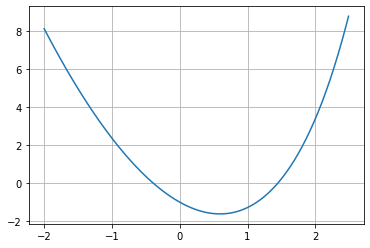

In [85]:
#Primero graficamos la función f(x)=y
import matplotlib.pyplot as plt
import numpy as np
x=arange(-2,2.5,0.01)
plot(x,x**2-3*x+np.exp(x)-2)
grid(True)

Usaré el método de Newton ya que este tiene una mejor aproximación en menos pasos, además de que la derivada de esta función es una función "suave". Usando así como punto inicial $x_0=-1,2$

In [273]:
#Newton
def newton(g,dg,x,epsilon=1e-17):
    dx=2*epsilon
    contador =0
    while dx> epsilon and contador<1000:
        x1=x-g(x)/dg(x)
        dx=abs(x-x1)
        x=x1
        contador=contador+1
    return [x]

In [274]:
def g(x):
    return x**2-3*x+np.exp(x)-2
def dg(x):
    return 2*x-3+np.exp(x)

In [275]:
print("Primer raíz, x=",newton(g,dg,-1)[0], "Error=", abs(-0.39027168616010888398-newton(g,dg,-1)[0]) )
print("Segunda raíz, x=",newton(g,dg,2)[0], "Error=", abs(1.4462386859664265816-newton(g,dg,2)[0]) )

Primer raíz, x= -0.3902716861601088 Error= 5.551115123125783e-17
Segunda raíz, x= 1.4462386859664267 Error= 0.0


El error fué comparado con la solución "real", tomada de Mathematica que tiene $20$ cifras significativas (python solo toma $16$). 
Este error numperico esta controlado por la tolerancia "epsilon" dada en la función "newton", esto acota la aproximación de las cifras significativas.
El factor $e-17$  básicamente hace que la aproximación sea muy buena y que todas las cifras dadas de la aproximación de la raíz sean cifras significativas. El error en la segunda raíz $0.0$ dice que con la memoria de la computadora y la tolerancia de $1e-17$ basta para decir que esas 16 cifras son exactas a las reales. 

### 4.- Guerra de Métodos

Definimos todas las funciones de todos los métodos vistos en clase

In [276]:
def incremental(f,a,b,dx):
    x0=a;f0=f(x0)
    x1=x0+dx;f1=f(x1)
    contador=0.0
    while f0*f1>0.0:
        if x1>=b: return ('No hay raíz en el intervalo seleccionado') 
        x0=x1;f0=f1
        x1=x0+dx;f1=f(x1)
        contador=contador+1
    return [x1,contador]

In [9]:
#Biseccion
def biseccion(f,a,b,epsilon):
    contador=0
    dx=abs(b-a)
    while dx>epsilon:
        x=(a+b)/2.0
        if (f(a)*f(x))<0:
            b=x 
        else:
            a=x 
        dx=abs(b-a) 
        contador=contador+1
    return [x, contador]

In [284]:
#Newton
def newton(f,df,x,epsilon):
    dx=2*epsilon
    contador =0
    while dx> epsilon and contador<1000:
        x1=x-f(x)/df(x)
        dx=abs(x-x1)
        x=x1
        contador=contador+1
    return [x,contador]

In [131]:
#Secante
def secante(f, x0, x1, delta):
    f0 = f(x0)
    f1 = f(x1)
    res = [[x0, f(x0), np.nan], 
           [x1, f(x1), x1 - x0],]
    while True: 
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        f2 = f(x2)
        res.append([x2, f2, x2-x1])
        if abs(f2) < delta:
            break
        f0 = f1
        f1 = f2
        x0 = x1
        x1 = x2
    return res

In [256]:
#Ridders (Kiusalaas)
def ridders(f,a,b,tol=1e-9):
    contador=1
    fa=f(a)
    if fa==0: return [a,contador]
    fb=f(b)
    if fb==0: return [b,contador]
    if fa*fb>0.0: return('No hay raíz en el intervalo seleccionado') 
    for i in range(30): 
        c=0.5*(a+b);fc=f(c) 
        s=sqrt(fc**2-fa*fb)
    if s==0.0: return None
    dx=(c-a)*fc/s
    if(fa-fb)<0.0:dx=-dx 
    x=c+dx; fx=f(x)
    x_vieja=x
    if i>0:
        if abs(x-x_vieja) < tol*max(abs(x),1.0): return [x,contador]
    if fc*fx>0.0:
        if fa*fx<0.0: b=x;fb=fx
        else: a=x;fa=fx
    else:
        a=c;b=x;fa=fc;fb=fx
    contador=contador+1
    return None
    print('Muchas iteraciones')


$i)$ $f(x)=x^n-2$ con $n=1,2,3,4$

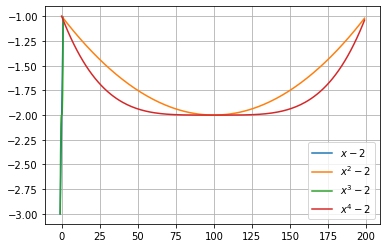

In [249]:
from pylab import *
x=arange(-1,1,0.01)
s1=x-2
s2=x**2-2
s3=x**3-2
s4=x**4-2
plot(x,s1,s2)
plot(x,s3,s4)
legend(('$x-2$', '$x^2-2$','$x^3-2$','$x^4-2$',),loc='lower right')
grid(True)

In [263]:
#n=1
def f(x):
    return x-2
def df(x):
    return 1
print("Incremental x=",incremental(f,-2,2,1e-5)) 
print("Bisección x=",biseccion(f,-2,2,2e-9))
print("Newton x=",newton(f,df,2,1e-9))
print("Secante x=",secante(f,-2,2,1e-9)[2][0])
print("Ridders x=", ridders(f,-2,2))
print("Exacto x=", 0)

Incremental x= [2.00000000000927, 399999.0]
Bisección x= [1.9999999981373549, 31]
Newton x= [2.0]
Secante x= 2.0
Ridders x= [2, 1]
Exacto x= 0


In [264]:
#n=2     Se tomo (0,2] ya que la otra raíz es simétrica
def f(x):
    return x**2-2
def df(x):
    return 2*x
print("Incremental x=",incremental(f,0.1,2,1e-5)) 
print("Bisección x=",biseccion(f,0.1,2,2e-9))
print("Newton x=",newton(f,df,2,1e-9))
print("Secante x=",secante(f,0.1,2,1e-9)[2][0])
print("Ridders x=", ridders(f,0.1,2))
print("Mathematica x=", 1.4142135623730950488016887)

Incremental x= [1.4142200000008034, 131421.0]
Bisección x= [1.4142135635949673, 30]
Newton x= [1.4142135623730951]
Secante x= 1.0476190476190477
Ridders x= [1.4397571748553828, 1]
Mathematica x= 1.4142135623730951


In [265]:
#n=3    Se tomo [-1.5,1.5] aunque en este caso, la raíz estan en x=0 y no se obtienen buenos resultados
def f(x):
    return (x**3)-2
def df(x):
    return 3*(x**2)
print("Incremental x=",incremental(f,-3,3,1e-5)) 
print("Bisección x=",biseccion(f,-1,1,2e-9))
print("Newton x=",newton(f,df,1.5,1e-9))
print("Secante x=",secante(f,-1.5,1.5,1e-9)[2][0])
print("Ridders x=", ridders(f,-1.5,1.5))
print("Exacto x=", 0)

Incremental x= [1.2599300000109728, 425992.0]
Bisección x= [0.9999999981373549, 30]
Newton x= [1.2599210498948732]
Secante x= 0.8888888888888888
Ridders x= [0.8888888888888888, 1]
Exacto x= 0


In [266]:
#n=4   Se tomo [1,1.5] considerando que la otra raíz es simétrica y que las otras 2 raíces son complejeas,
# x=2 en Newton para alocarnos un poco
def f(x):
    return (x**4)-2
def df(x):
    return 4*(x**3)
print("Incremental x=",incremental(f,1,1.5,1e-5)) 
print("Bisección x=",biseccion(f,1,1.5,2e-9))
print("Newton x=",newton(f,df,2,1e-9))
print("Secante x=",secante(f,1,1.5,1e-9)[2][0])
print("Ridders x=", ridders(f,1,1.5))
print("Mathematica x=", 1.1892071150027210667175)

Incremental x= [1.1892100000012396, 18920.0]
Bisección x= [1.1892071161419153, 28]
Newton x= [1.189207115002721]
Secante x= 1.123076923076923
Ridders x= [1.1888569673725244, 1]
Mathematica x= 1.189207115002721


#### Discusión
Para estos casos se puede decir que el método de Ridders es de los más eficientes ya que obtiene la raíz con una tolerancia del orden de $1e-9$ en un solo paso!! Mientras que el método de "Incremental Search" con la misma tolerancia llega al valor pero en una cantidad de pasos mucho mayor. El método de Newton muere cuando $x=0$ así que esta batalla la gana el señor Ridders. 

$ii)$ $f(x)=5 \sin(5x)$

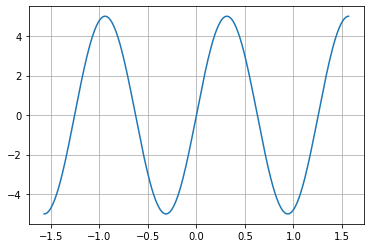

In [267]:
import matplotlib.pyplot as plt
x=arange(-pi/2,pi/2,0.01)
plot(x,5*sin(5*x))
grid(True)

Se toma sólo el intervalo $(0.5,0.8)$ para obtener la primer raíz a la "derecha" del cero, se probó con la raíz centrada en cero pero el método de Newton no daba resultados sensatos.

In [269]:
def f(x):
    return 5*sin(5*x)
def df(x):
    return 25*cos(5*x)
print("Incremental x=",incremental(f,0.5,0.8,1e-5)) #Con 1e-8 el tiempo aumenta pero da mejores resultados con mas pasos
print("Bisección x=",biseccion(f,0.5,0.8,2e-9))
print("Newton x=",newton(f,df,0.8,1e-9))
print("Secante x=",secante(f,0.5,0.8,1e-9)[2][0])
print("Ridders x=", ridders(f,0.5,0.8))
print("Mathematica x=", 0.628318530717959 )


Incremental x= [0.628319999999416, 12831.0]
Bisección x= [0.6283185299485923, 28]
Newton x= [0.6283185307179586, 5]
Secante x= 0.6324762066743153
Ridders x= [0.6261908049668996, 1]
Mathematica x= 0.628318530717959


#### Discusión 
Una vez más el método de Ridders parece poderoso, pero Newton con solo $5$ pasos obtiene un mejor resultado aunque ambos tienen la misma tolerancia de $1e-9$. El método de "Incremental" sigue usando muchos pasos y se le tiene que dar una menor tolerancia ya que el tiempo de computo aumenta bastante. Se planeaba calcular el tiempo de calculo, pero mi computadora tarda mucho en computar "Incremental" con esa tolerancia, aunque basta decir que el número de pasos es mucho mayor "$12831$" pasos. 
El señor Newton y su robin Raphson ganan esta batalla.

$iii)$ $f(x)=(\cos(2x))^2-x^2$

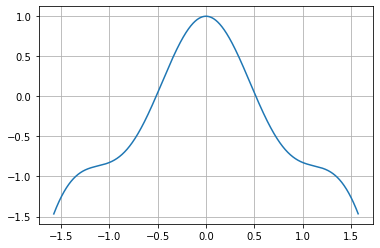

In [28]:
x=arange(-pi/2,pi/2,0.001)
plot(x,(cos(2*x))**2 - x**2)
grid(True)

En este caso se tomó el intervalo $[0,1]$ ya que la otra raíz es simétrica respecto al eje y. Y el punto inicial de Nweton $x_0 = 0.9$

In [272]:
def f(x):
    return (cos(2*x))**2 - x**2
def df(x):
    return -4*cos(2*x)*sin(2*x)-2*x
print("Incremental x=",incremental(f,0,1,1e-5))  
print("Bisección x=",biseccion(f,0,1,2e-9))
print("Newton x=",newton(f,df,0.9,1e-9))
print("Secante x=",secante(f,0,1,1e-9)[2][0])
print("Ridders x=", ridders(f,0,1))
print("Mathematica x=", 0.51493326466112941380)

Incremental x= [0.5149400000002913, 51493.0]
Bisección x= [0.5149332638829947, 29]
Newton x= [0.5149332646611294, 10]
Secante x= 0.5473987634095687
Ridders x= [0.5230299146852969, 1]
Mathematica x= 0.5149332646611294


#### Discusión 
Una vez más el método de Newton obtiene un mejor resultado usando sólo $10$ pasos. Todos los métodos están dados con una tolerancia de $1e-9$. Mathematica ofrece una precisión de $20$ cifras significativas. Suficientes para decir que Newton ganó de nuevo. 

$iv)$ $f(x)=5(\sqrt{|(x+2)|} -1 )$ 

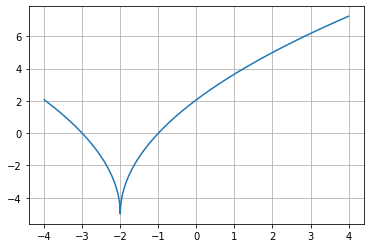

In [278]:
x=arange(-4,4,0.001)  
plot(x,  5*(sqrt(abs(x+2))-1))
grid(True)

En este caso se tomaron dos intervalos $[-3.5,-2.5]$ y $[-1.5,0.5]$ para obtener los dos valores de las raíces.

In [290]:
#Primer raíz [-3.5,3.5]
def f(x):
    return 5*(sqrt(abs(x+2))-1)
def df(x): 
    return (5*(x+2))/(2+(abs(x+2))**(3/2) )
print("Incremental x=",incremental(f,-3.5,-2.5,1e-5))  
print("Bisección x=",biseccion(f,-3.5,-2.5,2e-9))
print("Newton x=",newton(f,df,-4,1e-9))
print("Secante x=",secante(f,-3.5,-2.5,1e-9)[2][0])
print("Ridders x=", ridders(f,-3.5,-2.5))
print("Exacta x=",-3 )

Incremental x= [-2.9999999999967244, 49999.0]
Bisección x= [-2.500000001862645, 29]
Newton x= [-3.0, 2]
Secante x= -3.065826248793698
Ridders x= [-3.0, 1]
Exacta x= -3


In [316]:
#Segunda raíz [-1.5,0.5]
def f(x):
    return 5*(sqrt(abs(x+2))-1)
def df(x): 
    return (5*(x+2))/(2+(abs(x+2))**(3/2) )
print("Incremental x=",incremental(f,-1.5,0.5,1e-5))  
print("Bisección x=",biseccion(f,-1.4,-0.4,2e-9))
print("Newton x=",newton(f,df,-1.5,1e-9))
print("Secante x=",secante(f,-0.5,0.3,1e-9)[2][0])
print("Ridders x=", ridders(f,-1.4,0.4))
print("Exacta x=",-1 )

Incremental x= [-0.9999999999967245, 49999.0]
Bisección x= [-0.9999999996274709, 29]
Newton x= [-0.9999999998153802, 29]
Secante x= -1.1160976018987716
Ridders x= [-0.9844882801577125, 1]
Exacta x= -1


#### Discusión 
Incremental search sigue siendo buena opción pero usa muchos pasos para llegar a la solución, es por eso que es el rival más décil. Con la tolerancia de $1e-9$ el método de Newton una vez más gana este encuentro, aunque Ridders lo hace en un sólo paso, Newton tiene mayor precisión.

$v)$  $  f(x)= e^{-x} \log(x)   $

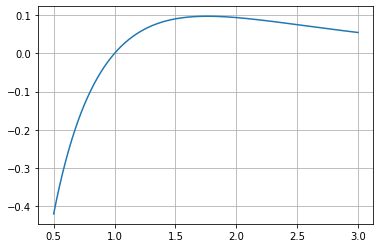

In [295]:
import numpy as np
x = np.linspace(0.5, 3, 1000, endpoint=True)
C, S = x, np.exp(-x)*np.log(x)
plt.plot(C,S)
grid(True)

Se usó el intervalo $[0.5,1.5]$ y para Newton se usó el punto inicial $x_0 = 1.4$. 

In [317]:
def f(x):
    return np.log(x)/np.exp(x)
def df(x): 
    return (np.exp(-x)*(1-x*np.log(x)))/x
print("Incremental x=",incremental(f,0.5,1.5,1e-5))  
print("Bisección x=",biseccion(f,0.5,1.2,2e-9))
print("Newton x=",newton(f,df,1.4,1e-9))
print("Secante x=",secante(f,0.4,1.4,1e-9)[2][0])
print("Ridders x=", ridders(f,0.5,1.5,1e-9))
print("Exacta x=",1 )

Incremental x= [1.0000099999977246, 50000.0]
Bisección x= [1.0000000001862643, 29]
Newton x= [1.0, 8]
Secante x= 1.2809878313246332
Ridders x= [1.0, 1]
Exacta x= 1


#### Discusión 
Ya que todos los métodos tienen una tolerancia de $1e-9$ con excepción del método "Incremental" que tiene $1e-5$. El método del señor Ridders vuelve a ganar la batalla ya que obtiene el valor exacto de la raíz en un solo paso. 

$vi)$  $f(x)=(x-1)^3$  

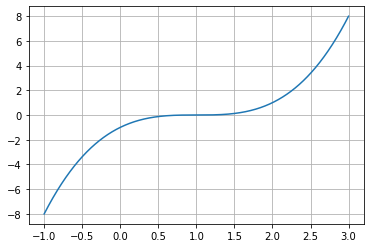

In [22]:
x=arange(-1,3,0.001)  #
plot(x, (x-1)**3 )
grid(True)

Se tomó el intervalo $[0.5,1.5]$ y el punto inicial de Newton $x_0= 0.5$

In [318]:
def f(x):
    return (x-1)**3
def df(x): 
    return 3*(x-1)**2
print("Incremental x=",incremental(f,0.5,1.5,1e-5))  
print("Bisección x=",biseccion(f,0.5,1.5,2e-9))
print("Newton x=",newton(f,df,0.5,1e-8))
print("Secante x=",secante(f,0.5,1.5,1e-9)[2][0])
print("Ridders x=", ridders(f,0.5,1.5))
print("Exacta x=",1.0 )

Incremental x= [1.0000099999977246, 50000.0]
Bisección x= [1.4999999981373549, 29]
Newton x= [0.9999999866018182, 43]
Secante x= 1.0
Ridders x= [1.0, 1]
Exacta x= 1.0


#### Discusión
Ridders gana porque obtiene la solución exacta en un único paso. Newton es prometedor pero usa más pasos para una solución buena pero no exacta como la de Ridders. 

$vii)$ $f(x)=x^{25}$

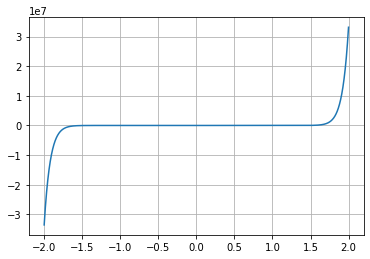

In [23]:
x=arange(-2,2,0.001)  #
plot(x, x**(25) )
grid(True)

Se tomó el intervalo $[-0.5,0.5]$ y el punto inicial de Newton $x_0=1$, para "incremental" se tomó $[-1.8,1.8]$ que es donde se aprecia el cambio de signo. 
En este caso el método de Newton falla ya que la raíz está en $x=0$ y en esos casos sabemos que Newton no es confiable.

In [315]:
def f(x):
    return (x**(25))
def df(x): 
    return 25*(x**(24))
print("Incremental x =",incremental(f,-1.8,1.8,1e-4))  
print("Bisección x =",biseccion(f,-0.4,0.4,2e-9))
print("Newton x =",newton(f,df,2,1e-9))
print("Secante x =",secante(f,-0.5,0.5,1e-9)[2][0])
print("Ridders x =", ridders(f,-0.5,0.5,1e-9))
print("Exacta x =",0 )


Incremental x = [-1.8196926712850392e-13, 17999.0]
Bisección x = [0.3999999985098839, 29]
Newton x = [2.378324799169387e-08, 447]
Secante x = 0.0
Ridders x = [0.0, 1]
Exacta x = 0


#### Discusión 
En este caso como la solución esta en $x=0$ el método de Newton acierta en el sentido que da "cero", esto sucede porque la derivada es bastante suave pero ocupa muchos más pasos para llegar. 
El método de la secante y el método de Ridders ganan este encuentro al llegar a la solución exacta. Es de notar que el método Bisección es muy inestable. 